In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [28]:
# Import data
a = pd.read_csv('F:/Work/Visualizatoin Code with Python/Free code camp data analysis with python projects/Project four/fcc-forum-pageviews.csv')
df = pd.DataFrame(a)
df = df.set_index(pd.to_datetime(df.date))
df = df.drop('date', axis = 1)

In [29]:
print(df.tail(), df.shape, df.index.dtype)

             value
date              
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549 (1304, 1) datetime64[ns]


In [30]:
# Clean data

x = df.value.quantile(0.975)
y = df.value.quantile(0.025)

df = df.loc[df.value < x]  

df = df.loc[df.value > y]  
    
df.shape

(1238, 1)

In [5]:
def draw_line_plot():
    # Draw line plot
    fig = plt.figure( figsize = (12,6))
    ax = fig.add_subplot(111)
    ax.plot(df.index , df.value , color ='green', lw = 2 )
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


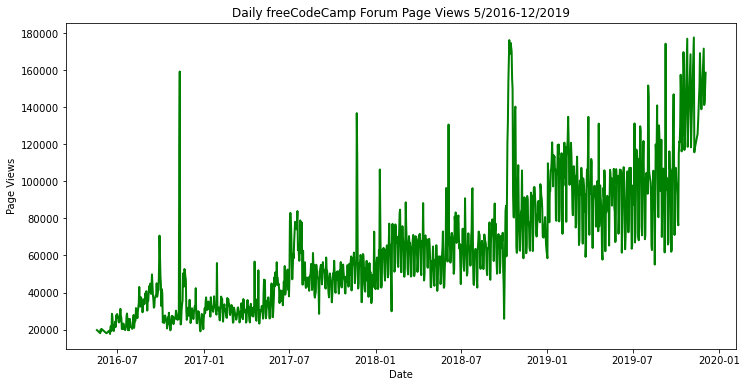

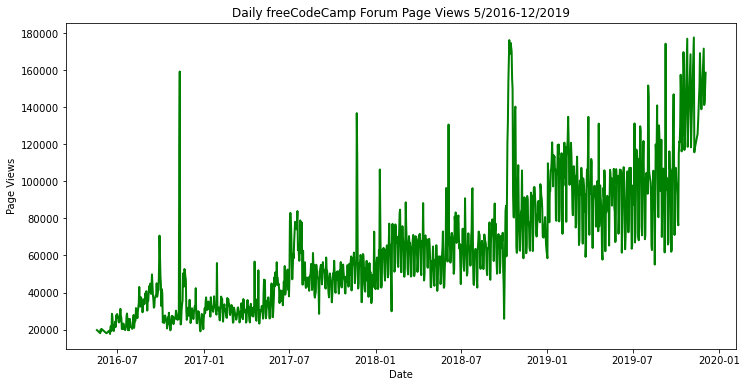

In [6]:
draw_line_plot()

In [7]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_barr = df.groupby([df.index.year, df.index.month_name()]).mean()
    df_barr = df_barr.set_index(df_barr.index.rename(['Years', 'Months']))
    df_barr = df_barr.reset_index(level = ['Years' , 'Months'])
    df_bar = df_barr.pivot("Years", "Months", "value")
    df_bar = df_bar[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August' , 'September' , 'October', 'November' , 'December']]


    # Draw bar plot
    fig = plt.figure( figsize = (12,9))
    ax = fig.add_subplot(111)
    df_bar.plot( kind= 'bar', ax = ax )
    ax.set_ylabel('Average Page Views')
    ax.set_xlabel('Years')

    




    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

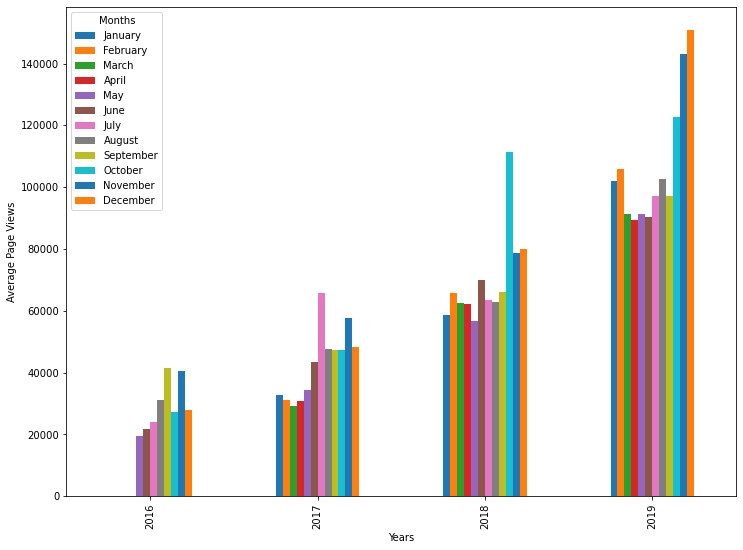

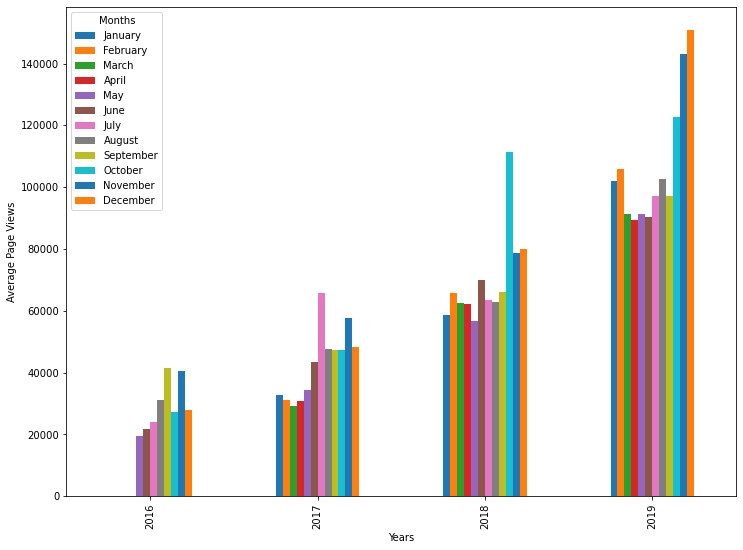

In [8]:
draw_bar_plot()

In [9]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
     # Draw box plots (using Seaborn)
             
        
    fig = plt.figure( figsize = (20,7))
    ax1 = fig.add_subplot(121)
    sns.boxplot(x = df_box.year , y = df_box.value , ax = ax1)
    ax1.set_ylabel('Page Views')
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel('Year')

    ax2 = fig.add_subplot(122)
    sns.boxplot(x = df_box.month , y = df_box.value , ax = ax2 , order = ['Jan' , 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep' , 'Oct', 'Nov' , 'Dec' ])
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_ylabel('Page Views')
    ax2.set_xlabel('Month')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


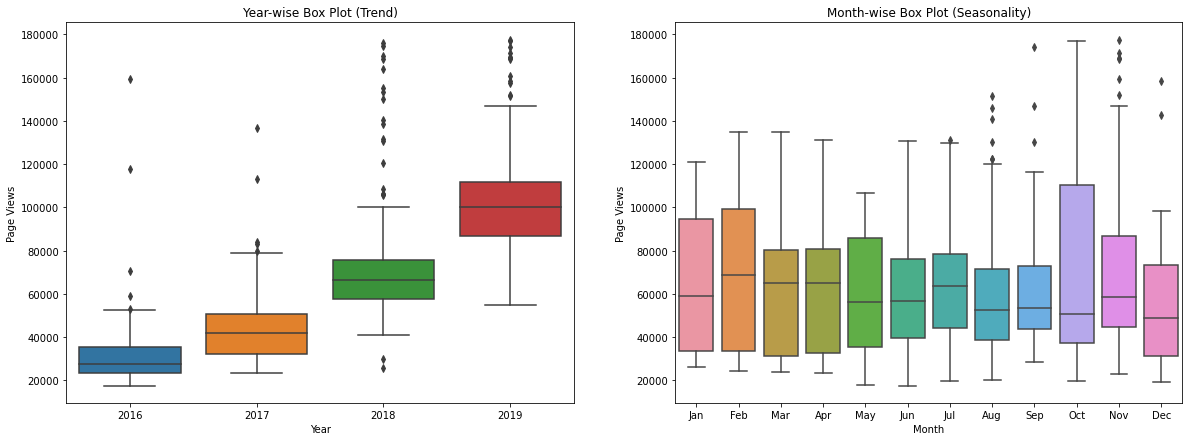

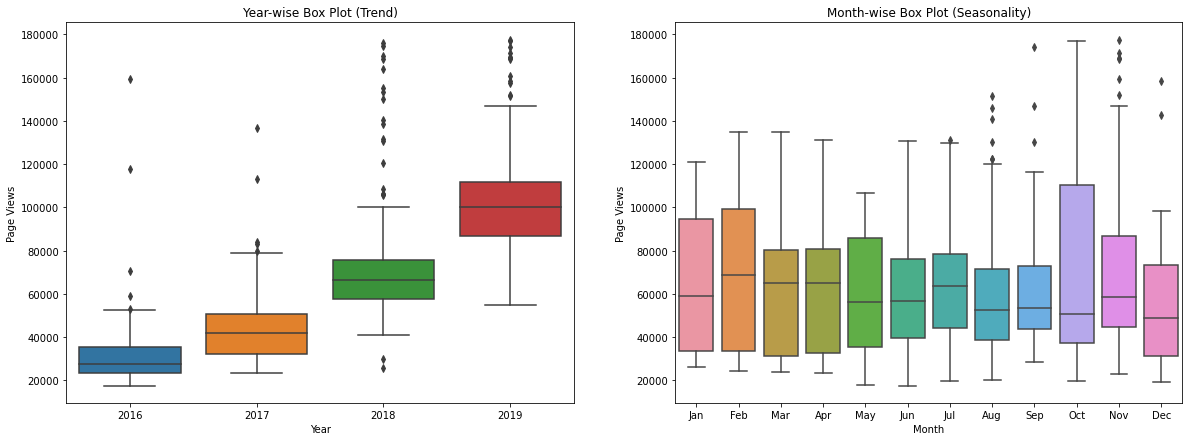

In [10]:
draw_box_plot()